#Importing necessary libraries

In [2]:

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LinearRegression  # Linear Regression algorithm
from sklearn.ensemble import RandomForestRegressor  # Random Forest algorithm
from xgboost import XGBRegressor  # XGBoost algorithm
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics
from sklearn.impute import SimpleImputer  # For handling missing values

# Load the dataset
# Assuming the dataset is downloaded and saved as 'Life Expectancy Data.csv'

In [3]:
df = pd.read_excel('led.xlsx')  # Load the dataset

# Display basic information about the dataset

In [4]:
print("Dataset Information:")
print(df.info())  # Shows columns, non-null counts, and data types
print("\nFirst 5 rows of the dataset:")
print(df.head())  # Displays first 5 rows to understand the data structure


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-nu

In [5]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Preprocessing

> # Check for missing values



In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())  # Counts null values in each column


Missing values in each column:
Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64


# Handle missing values
# We'll use median imputation for numerical columns and mode for categorical

In [7]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create imputers

In [8]:
num_imputer = SimpleImputer(strategy='median')  # Replaces missing values with median
cat_imputer = SimpleImputer(strategy='most_frequent')  # Replaces missing values with most frequent value

# Apply imputation

In [9]:
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


# Verify no missing values remain

In [10]:
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64


# Exploratory Data Analysis (EDA)

# Summary statistics

In [11]:
print("\nSummary statistics:")
print(df.describe())  # Shows count, mean, std, min, max, etc.


Summary statistics:
              Year  Lifeexpectancy  AdultMortality  infantdeaths      Alcohol  \
count  2938.000000     2938.000000     2938.000000   2938.000000  2938.000000   
mean   2007.518720       69.234717      164.725664     30.303948     4.546875   
std       4.613841        9.509115      124.086215    117.926501     3.921946   
min    2000.000000       36.300000        1.000000      0.000000     0.010000   
25%    2004.000000       63.200000       74.000000      0.000000     1.092500   
50%    2008.000000       72.100000      144.000000      3.000000     3.755000   
75%    2012.000000       75.600000      227.000000     22.000000     7.390000   
max    2015.000000       89.000000      723.000000   1800.000000    17.870000   

       percentageexpenditure   HepatitisB        Measles          BMI  \
count            2938.000000  2938.000000    2938.000000  2938.000000   
mean              738.251295    83.022124    2419.592240    38.381178   
std              1987.914858  

# Visualize the distribution of the target variable (Life expectancy)

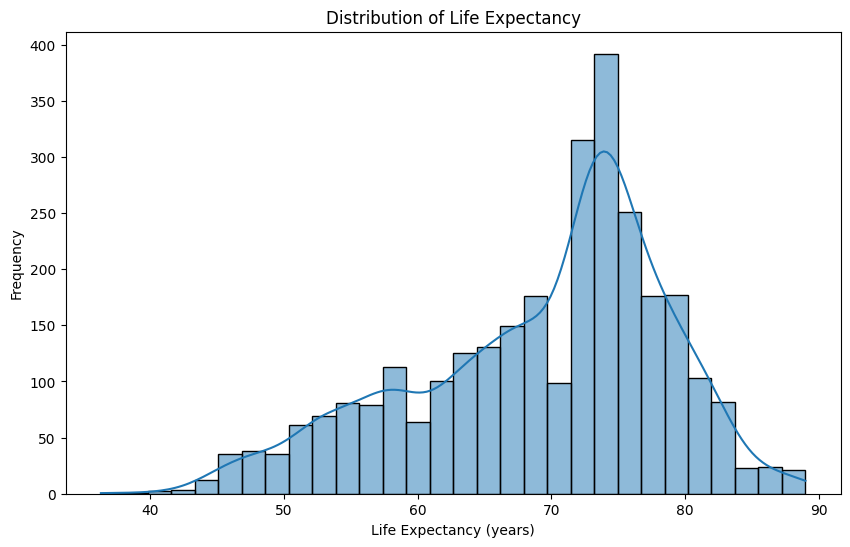

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Lifeexpectancy'],kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix to understand relationships between variables

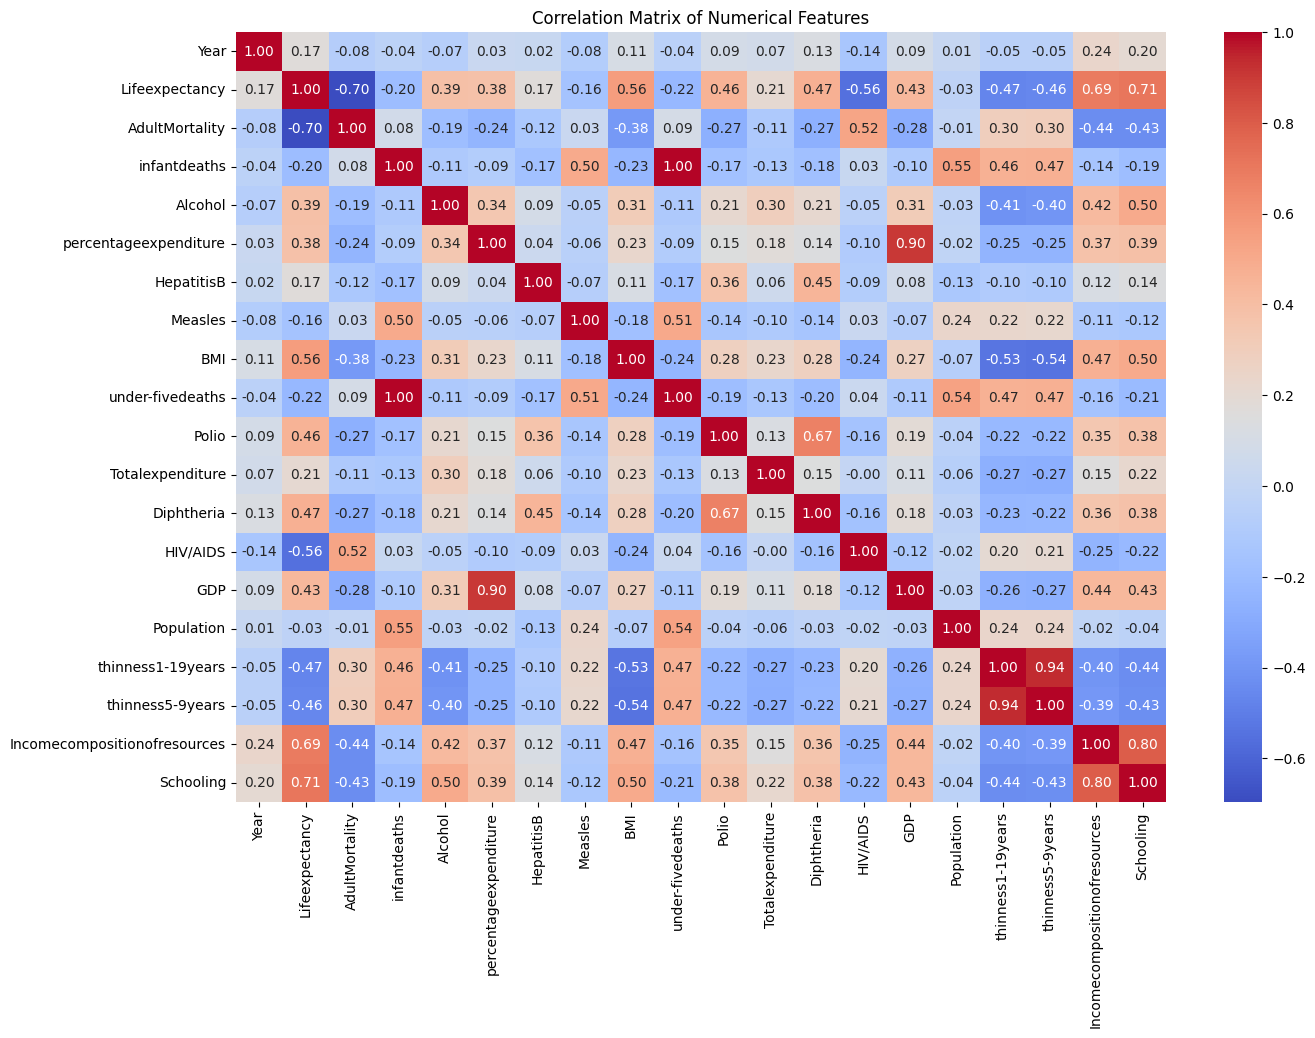

In [13]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr(numeric_only=True)  # Calculates correlation between numerical columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

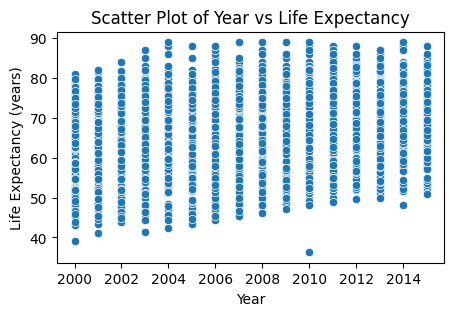

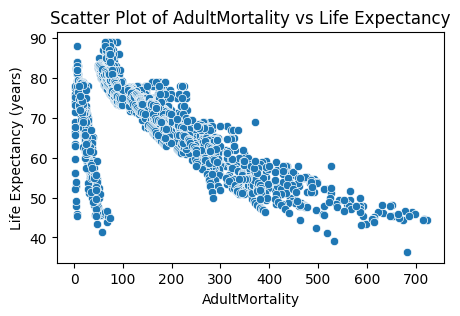

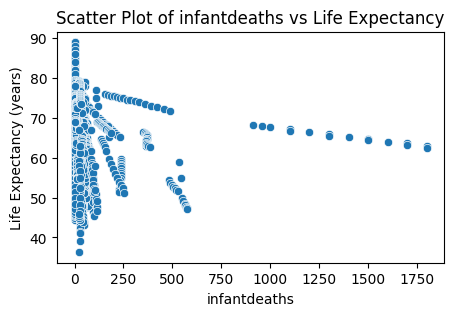

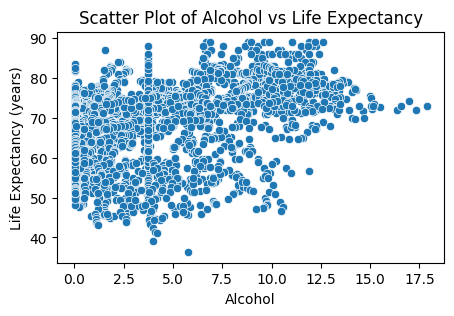

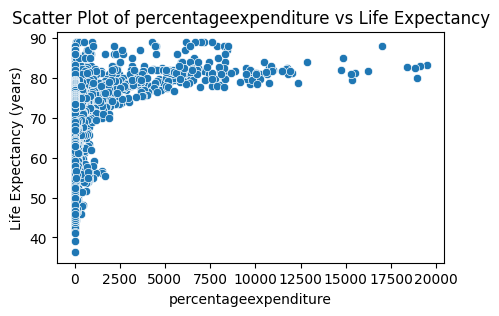

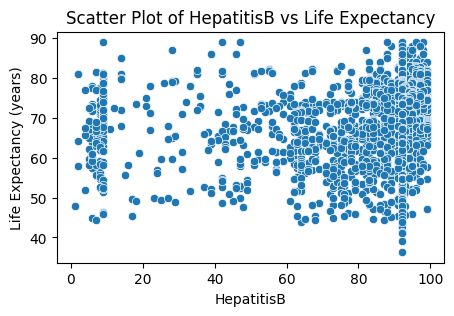

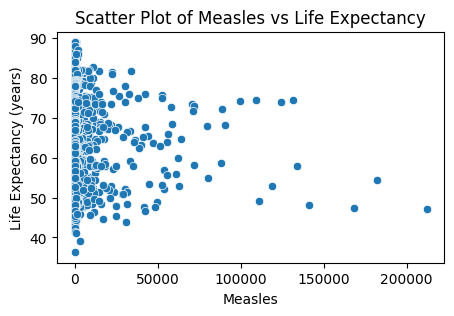

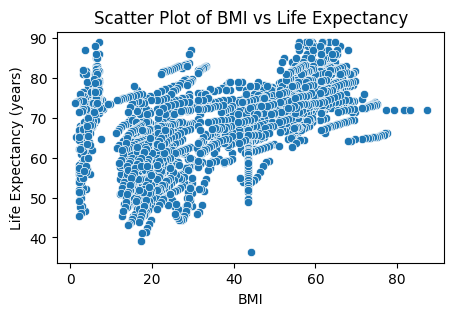

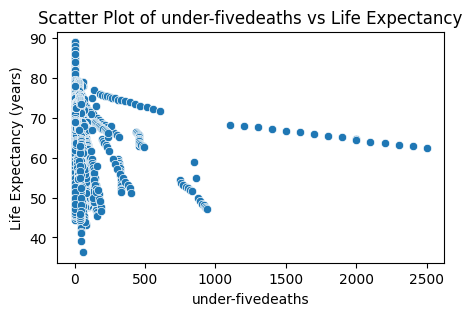

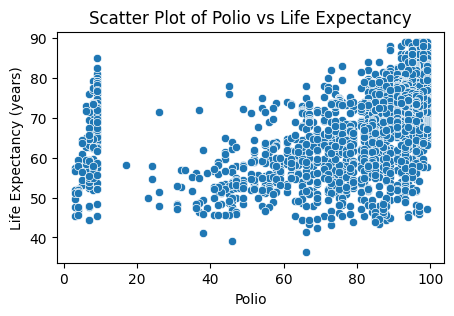

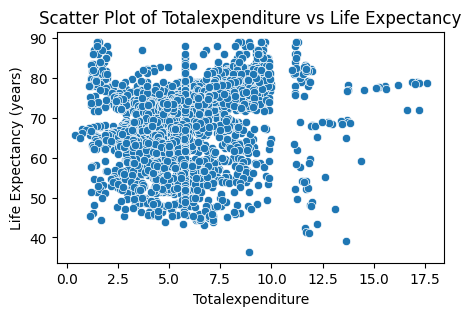

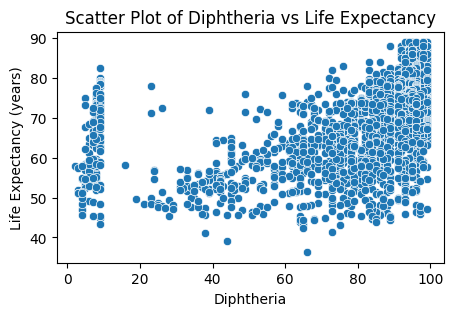

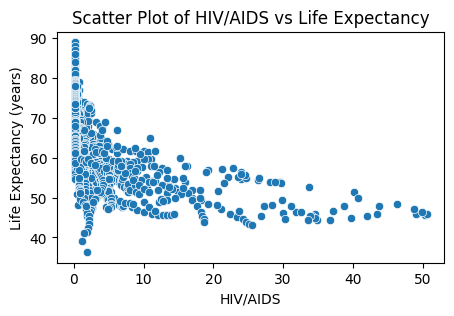

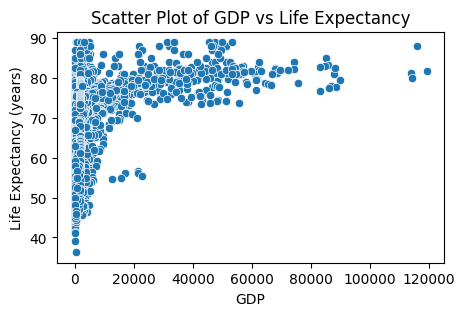

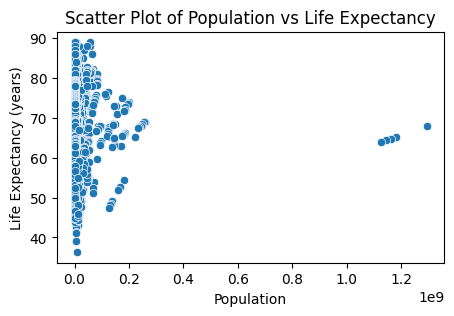

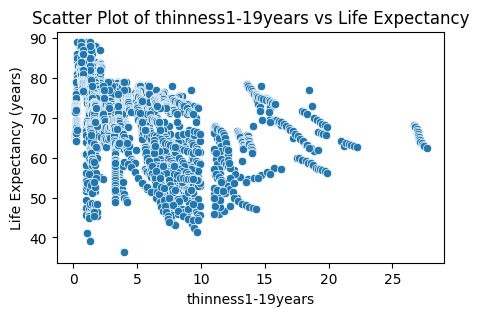

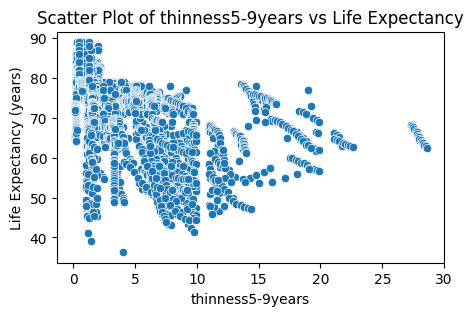

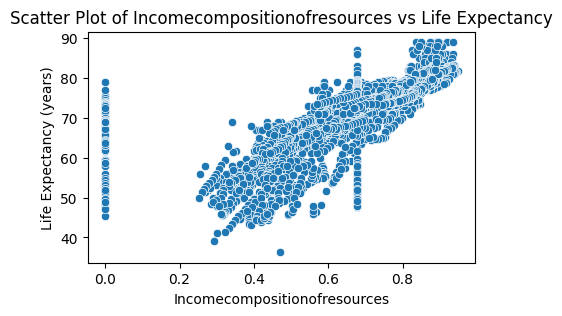

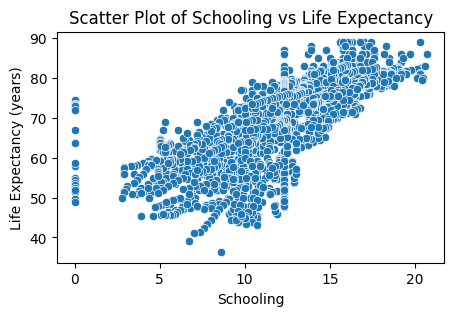

In [14]:
#plot scatter plots for each feature against Life Expectancy
for col in numerical_cols:
    if col != 'Lifeexpectancy':
        plt.figure(figsize=(5, 3))
        sns.scatterplot(x=df[col], y=df['Lifeexpectancy'])
        plt.title(f'Scatter Plot of {col} vs Life Expectancy')
        plt.xlabel(col)
        plt.ylabel('Life Expectancy (years)')
        plt.show()

# Feature Engineering
# Encoding categorical variables (Country and Status)

In [15]:
df = pd.get_dummies(df, columns=['Status'], drop_first=True)  # Converts Status to binary (1 for Developed, 0 for Developing)

# For Country, since there are many unique values, we'll drop it to avoid high dimensionality

In [16]:
df.drop('Country', axis=1, inplace=True)  # Removes Country column

# Define features (X) and target (y)

In [17]:
X = df.drop('Lifeexpectancy', axis=1)  # All columns except Life expectancy
y = df['Lifeexpectancy']  # Target variable we want to predict

# Split the data into training and testing sets (80% train, 20% test)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
# Many algorithms perform better when features are on similar scales

In [19]:
scaler = StandardScaler()  # Standardizes features by removing mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform test data using same scaling

# Model Building and Evaluation

# Dictionary to store evaluation results
# 1. Linear Regression

In [20]:
results = {}

# 1. Linear Regression
lr = LinearRegression()  # Creates a linear regression model
lr.fit(X_train_scaled, y_train)  # Trains the model on scaled training data
y_pred_lr = lr.predict(X_test_scaled)  # Makes predictions on test data


# Calculate evaluation metrics

In [21]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Root Mean Squared Error
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Mean Absolute Error
r2_lr = r2_score(y_test, y_pred_lr)  # R-squared score

In [22]:
# Store results
results['Linear Regression'] = {'RMSE': rmse_lr, 'MAE': mae_lr, 'R2': r2_lr}

# 2. Random Forest Regressor

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Creates RF model with 100 trees
rf.fit(X_train_scaled, y_train)  # Trains the model
y_pred_rf = rf.predict(X_test_scaled)  # Makes predictions

# Calculate metrics

In [24]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Store results

In [25]:
results['Random Forest'] = {'RMSE': rmse_rf, 'MAE': mae_rf, 'R2': r2_rf}

# 3. XGBoost Regressor

In [26]:
xgb = XGBRegressor(n_estimators=100, random_state=42)  # Creates XGBoost model with 100 trees
xgb.fit(X_train_scaled, y_train)  # Trains the model
y_pred_xgb = xgb.predict(X_test_scaled)  # Makes predictions


# Calculate metrics

In [27]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


# Store results

In [28]:
results['XGBoost'] = {'RMSE': rmse_xgb, 'MAE': mae_xgb, 'R2': r2_xgb}

# 4. Support Vector Regression

In [29]:
svr = SVR(kernel='rbf')  # Creates SVR model with Radial Basis Function kernel
svr.fit(X_train_scaled, y_train)  # Trains the model
y_pred_svr = svr.predict(X_test_scaled)  # Makes predictions

# Calculate metrics

In [30]:
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)


# Store results

In [31]:
results['Support Vector Regression'] = {'RMSE': rmse_svr, 'MAE': mae_svr, 'R2': r2_svr}

# Display results

In [32]:
print("\nModel Evaluation Results:")
for model, metrics in results.items():
    print(f"\n{model}:")
    print(f"RMSE: {metrics['RMSE']:.2f}")  # Lower is better
    print(f"MAE: {metrics['MAE']:.2f}")  # Lower is better
    print(f"R2 Score: {metrics['R2']:.2f}")  # Closer to 1 is better


Model Evaluation Results:

Linear Regression:
RMSE: 3.91
MAE: 2.86
R2 Score: 0.82

Random Forest:
RMSE: 1.66
MAE: 1.08
R2 Score: 0.97

XGBoost:
RMSE: 1.75
MAE: 1.18
R2 Score: 0.96

Support Vector Regression:
RMSE: 3.32
MAE: 2.31
R2 Score: 0.87


# Feature Importance for the best performing model (Random Forest or XGBoost)
# Let's check feature importance from Random Forest

In [33]:
feature_importance = rf.feature_importances_  # Gets importance scores from trained RF model
features = X.columns  # Gets feature names

# Create a dataframe for visualization

In [34]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)  # Sorts by importance

# Plot feature importance

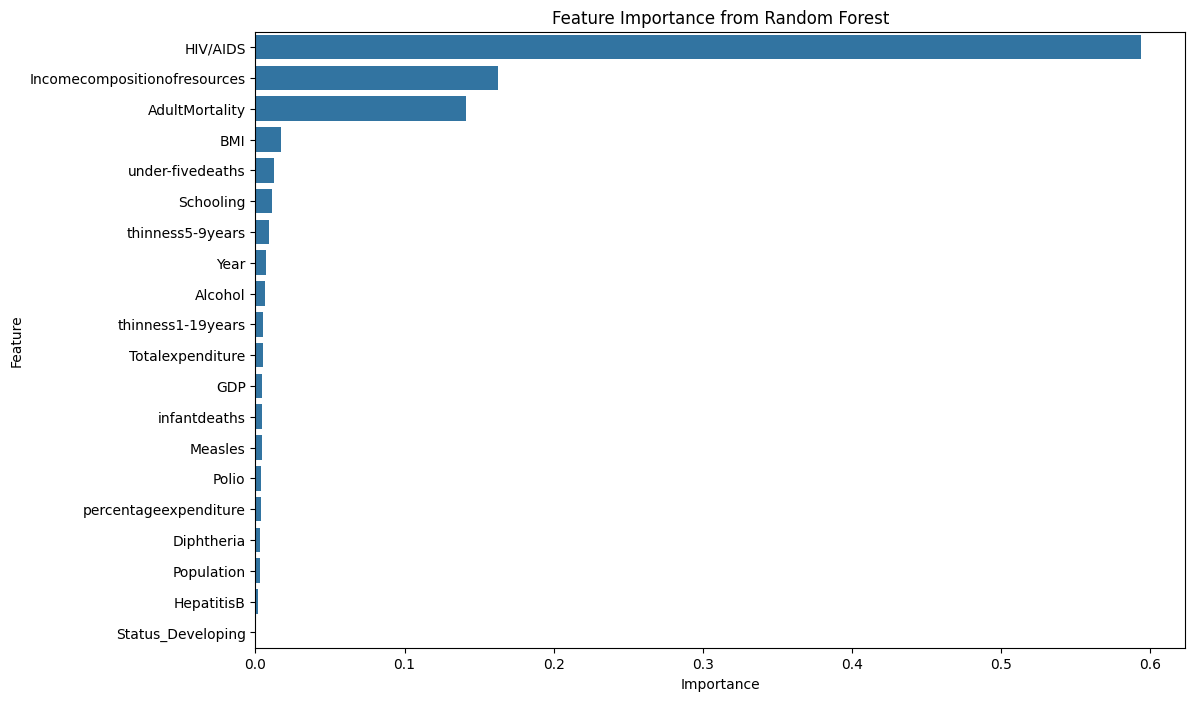

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

#gdp per capita

In [36]:
#implement simple linear regression to predict life expectancy based solely on GDP per capita
df['gdp_per_capita'] = df['GDP'] / df['Population']  # Calculate GDP per capita
#MULTIPLY GDP per capita by 100000 to scale it
df['gdp_per_capita'] *= 1000000  # Scale GDP per capita for better interpretability
print("\nGDP per Capita:")
print(df['gdp_per_capita'])  # Display first few rows of GDP per capita


GDP per Capita:
0         17.318314
1       1870.360746
2         19.908962
3        181.218991
4         21.331247
           ...     
2933      35.559872
2934      35.883715
2935     456.867875
2936      44.361960
2937      44.783803
Name: gdp_per_capita, Length: 2938, dtype: float64



Simple Linear Regression Results:
RMSE: 9.29
MAE: 7.63


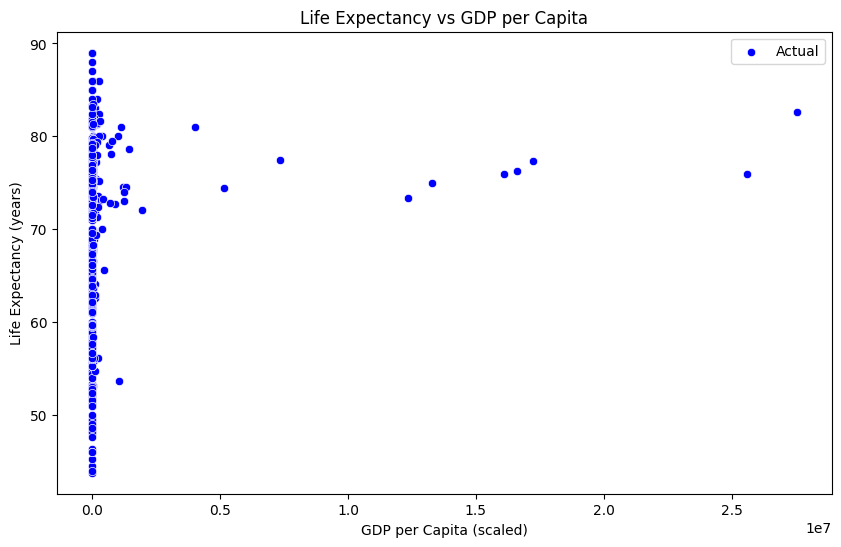

In [37]:
x = df[['gdp_per_capita']]  # Feature: GDP per capita
y = df['Lifeexpectancy']  # Target: Life expectancy
from sklearn.model_selection import train_test_split  # Import for splitting data
from sklearn.linear_model import LinearRegression  # Import for linear regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()  
lr.fit(x_train, y_train)  
y_pred = lr.predict(x_test)  
rmse_simple_lr = np.sqrt(mean_squared_error(y_test, y_pred))  
mae_simple_lr = mean_absolute_error(y_test, y_pred)  
print("\nSimple Linear Regression Results:")
print(f"RMSE: {rmse_simple_lr:.2f}")  
print(f"MAE: {mae_simple_lr:.2f}")  

plt.figure(figsize=(10, 6))


#sns.scatterplot(x=x_test['gdp_per_capita'], y=y_pred, label='Predicted', color='orange')
sns.scatterplot(x=x_test['gdp_per_capita'], y=y_test, label='Actual', color='blue')
plt.title('Life Expectancy vs GDP per Capita')
plt.xlabel('GDP per Capita (scaled)')
plt.ylabel('Life Expectancy (years)')
plt.legend()




Random Forest Regression Results:
RMSE: 9.77
MAE: 7.71


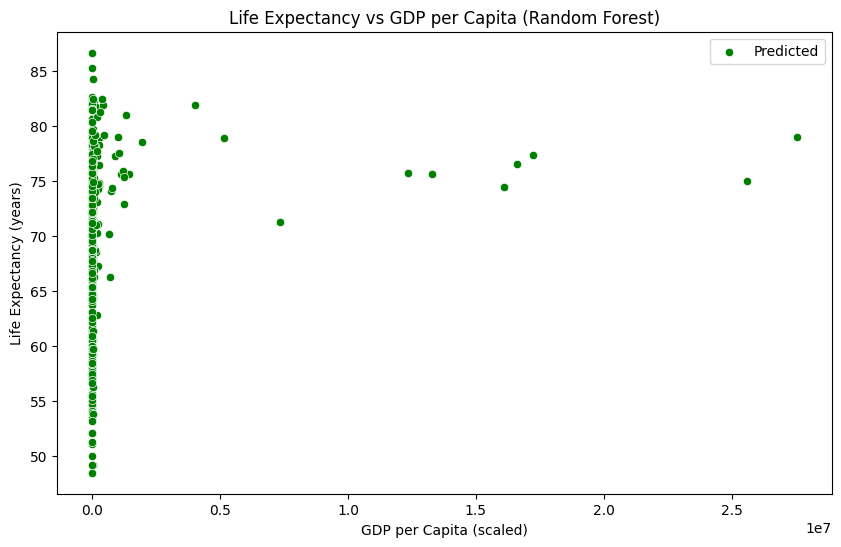

In [38]:
# random forest regression to predict life expectancy based on GDP per capita
rf_simple = RandomForestRegressor(n_estimators=100, random_state=42)
rf_simple.fit(x_train, y_train)  # Train the model
y_pred_rf_simple = rf_simple.predict(x_test)  # Make predictions
rmse_rf_simple = np.sqrt(mean_squared_error(y_test, y_pred_rf_simple))  # Calculate RMSE
mae_rf_simple = mean_absolute_error(y_test, y_pred_rf_simple)  # Calculate MAE
print("\nRandom Forest Regression Results:")
print(f"RMSE: {rmse_rf_simple:.2f}")  # Print RMSE
print(f"MAE: {mae_rf_simple:.2f}")  # Print MAE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test['gdp_per_capita'], y=y_pred_rf_simple, label='Predicted', color='green')
plt.title('Life Expectancy vs GDP per Capita (Random Forest)')
plt.xlabel('GDP per Capita (scaled)')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.show()  # Show the plot



<Axes: xlabel='Lifeexpectancy'>

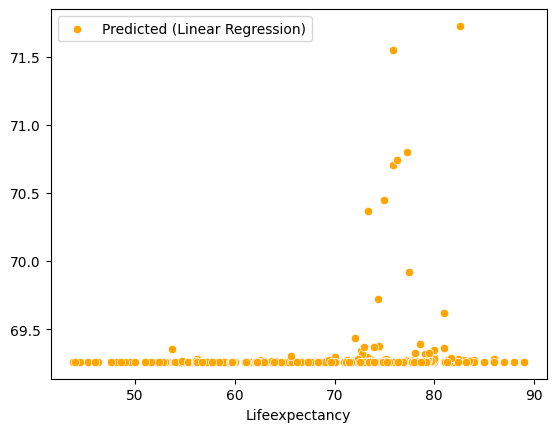

In [39]:
sns.scatterplot(x=y_test, y=y_pred, label='Predicted (Linear Regression)', color='orange')

In [40]:
df

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Status_Developing,gdp_per_capita
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True,17.318314
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True,1870.360746
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True,19.908962
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True,181.218991
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True,21.331247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,True,35.559872
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,True,35.883715
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,True,456.867875
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,True,44.361960


Create a linear regression model to predict life expectancy from immunization factors (Polio, Diphtheria, Hepatitis B). Interpret the coefficients - which vaccine has the strongest association with life expectancy? Use Data set of life expectancy shared earlier .

In [41]:
#Create a linear regression model to predict life expectancy from immunization factors (Polio, Diphtheria, Hepatitis B). Interpret the coefficients - which vaccine has the strongest association with life expectancy? Use Data set of life expectancy shared earlier .

immunization_features1 = df[['Schooling','Incomecompositionofresources']]
immunization_features = df[['Polio', 'Diphtheria', 'HepatitisB']]
immunization_target = df['Lifeexpectancy']
immunization_X_train, immunization_X_test, immunization_y_train, immunization_y_test = train_test_split(
    immunization_features1, immunization_target, test_size=0.2, random_state=42
)

In [42]:
from sklearn.linear_model import LinearRegression
immunization_lr = LinearRegression()
immunization_lr.fit(immunization_X_train, immunization_y_train)
immunization_y_pred = immunization_lr.predict(immunization_X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
immunization_rmse = np.sqrt(mean_squared_error(immunization_y_test, immunization_y_pred))
immunization_mae = mean_absolute_error(immunization_y_test, immunization_y_pred)
immunization_r2 = r2_score(immunization_y_test, immunization_y_pred)
print("\nImmunization Linear Regression Results:")
print(f"RMSE: {immunization_rmse:.2f}")
print(f"MAE: {immunization_mae:.2f}")
print(f"R2 Score: {immunization_r2:.2f}")





Immunization Linear Regression Results:
RMSE: 6.13
MAE: 4.33
R2 Score: 0.57


In [43]:
coefficients = immunization_lr.coef_
intercept = immunization_lr.intercept_

print("\nImmunization Linear Regression Coefficients:")
immunization_feature_names = immunization_features1.columns
print("\nImmunization Feature Coefficients:")
for feature, coef in zip(immunization_feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\nImmunization Feature INTERCEPTS:",intercept)
   
# Interpretation of coefficients
print("\nInterpretation of Coefficients:")
for feature, coef in zip(immunization_feature_names, coefficients):
    if coef > 0:
        print(f"A unit increase in {feature} is associated with an increase in life expectancy by {coef:.4f} years.")
    else:
        print(f"A unit increase in {feature} is associated with a decrease in life expectancy by {-coef:.4f} years.")





Immunization Linear Regression Coefficients:

Immunization Feature Coefficients:
Schooling: 1.2522
Incomecompositionofresources: 16.5652

Immunization Feature INTERCEPTS: 43.710149059244344

Interpretation of Coefficients:
A unit increase in Schooling is associated with an increase in life expectancy by 1.2522 years.
A unit increase in Incomecompositionofresources is associated with an increase in life expectancy by 16.5652 years.


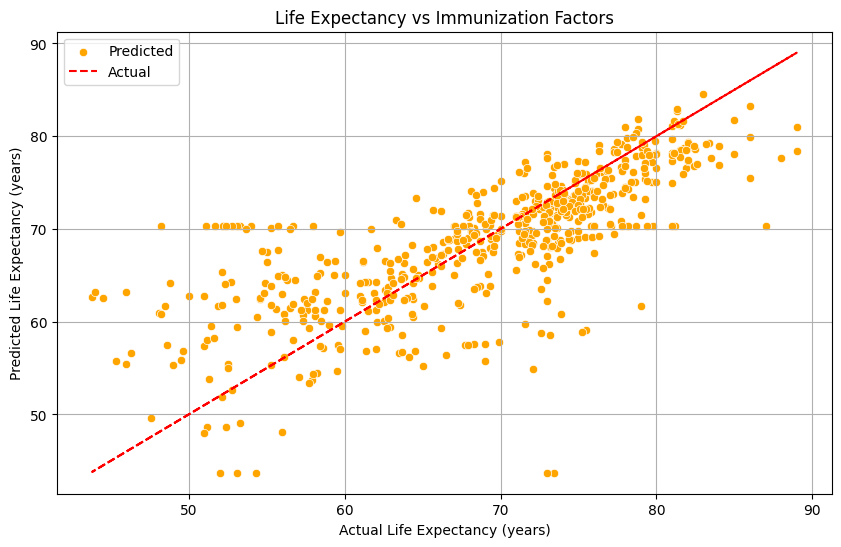

In [52]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=immunization_y_test, y=immunization_y_pred, label='Predicted', color='orange')

plt.plot(immunization_y_test, immunization_y_test, color='red', linestyle='--', label='Actual')  # Diagonal line for actual values
plt.grid(True)
plt.title('Life Expectancy vs Immunization Factors')
plt.xlabel('Actual Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (years)')
plt.legend()